In [2]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import dtale as dt
from ipyvizzu import Chart, Data, Config, Style
import plotly.express as px
import ast
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [3]:
df=pd.read_csv("realEstate.csv")

In [4]:


df['location'] = df['location'].apply(ast.literal_eval)

# Extract the 'lat' and 'lng' into separate columns
df[['lat', 'lng']] = df['location'].apply(lambda x: pd.Series({'lat': x['lat'], 'lng': x['lng']}))

# Convert 'lat' and 'lng' columns to float
df['lat'] = df['lat'].astype(float)
df['lng'] = df['lng'].astype(float)

# Drop the original 'location' column if no longer needed
df = df.drop(columns=['location'])


In [5]:
pd.set_option('display.precision', 12)

In [6]:
df = df.drop(['user_id', 'id','title', 'content','imgs', 'create_time','path','UserName','profileImg'], axis=1)

In [7]:
df['area'] = df.apply(lambda row: row['length'] * row['width'] if pd.isnull(row['area']) else row['area'], axis=1)

In [8]:
df = df.drop(df[df['price'] >100000].index)

In [9]:
df = df.drop(df[df['price'] <1200].index)

In [10]:
dt.show(df)

/opt/anaconda3/lib/python3.11/site-packages/dtale/views.py:816: FutureWarning:

['advertiser_type'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [32]:
df.columns

Index(['price', 'refresh', 'beds', 'livings', 'wc', 'area', 'street_width',
       'age', 'last_update', 'ketchen', 'ac', 'furnished', 'district', 'width',
       'length', 'advertiser_type', 'review', 'iam_verified', 'onMarket',
       'IsRent', 'lat', 'lng'],
      dtype='object')

In [33]:
dt.show(df)

In [44]:
df['price'].unique()

array([ 20000,  25000,  22000,  38000,  40000,  85000,  42000,  28000,
        19000,  27000,  70000,  34000,  50000,  78000,  10000,  30000,
        24000,  15000,  53000,  90000,  14000,  89000,  32000,  75000,
        18000,  35000,  60000,  16000,  33000,  36000,  21000,  23000,
        29000,  39000,  46000,  17000,  80000,  65000,  45000,  68000,
        55000,   6999,  58000,  20150,  40956,  31000,  13000,  44000,
        48000,  95000,  47000,  19500,  37500,  83000,  37000, 100000,
        49000,   6500,  12000,  26000,  63000,  74000,   1800,  23500,
        41000,  62000,  52000,  13500,  64000,   2399,   2500,  43000,
         9000,  67000,   4000,  87000,  44500,  66000,  28500,  30500,
        57000,  88000,  61500,  11000,  33500,  94000,   2600,  21500,
        77000,  72000,  18500,  54000,  84000,  58500,  40200,  17500,
        59000,  18600,  24500,  10500,  56000,  81000,   1700,  38500,
        22500,   8500,  15500,  51500,  17300,   5500,  69000,  27500,
      

In [45]:
df["lat"].unique()

array([24.80093 , 24.687521, 24.921463, ..., 24.807284, 24.870188,
       24.843407])

C:\Users\qouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



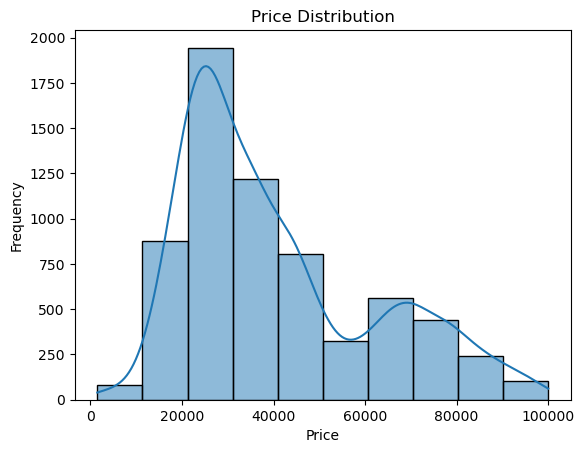

In [46]:
sns.histplot(df['price'], bins=10, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

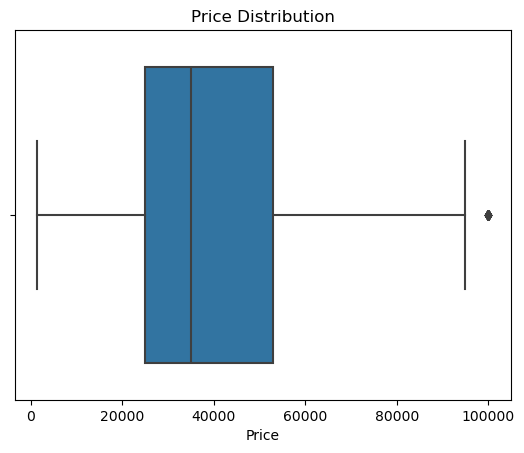

In [47]:
sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.title('Price Distribution')
plt.show()


In [53]:
df.columns

Index(['price', 'refresh', 'beds', 'livings', 'wc', 'area', 'street_width',
       'age', 'last_update', 'ketchen', 'ac', 'furnished', 'district', 'width',
       'length', 'advertiser_type', 'review', 'iam_verified', 'onMarket',
       'IsRent', 'lat', 'lng'],
      dtype='object')

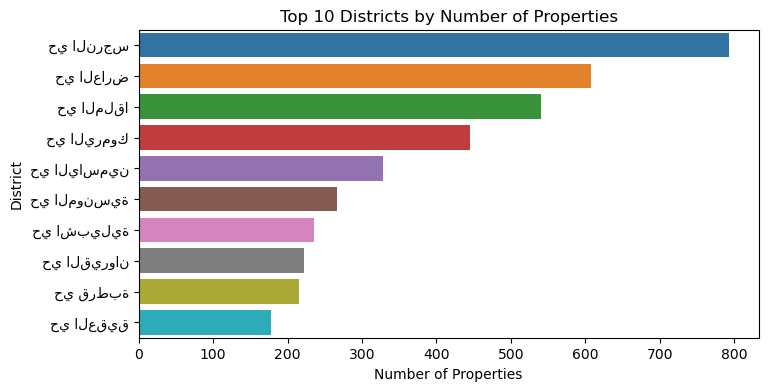

In [11]:
# Properties distribution by district
top_districts = df['district'].value_counts().nlargest(10).index
top_districts_df = df[df['district'].isin(top_districts)]
plt.figure(figsize=(8,4))
sns.countplot(y='district', data=top_districts_df, order=top_districts)
plt.title('Top 10 Districts by Number of Properties')
plt.xlabel('Number of Properties')
plt.ylabel('District')
plt.show()

In [12]:
district_counts = df['district'].value_counts()
top_10_districts = district_counts.nlargest(10)
df_top_10 = df[df['district'].isin(top_10_districts.index)]
fig = px.pie(df_top_10, 
             values=df_top_10['district'].value_counts().values, 
             names=df_top_10['district'].value_counts().index, 
             title='Top 10 Districts by Number of Properties in Riyadh')
fig.update_layout(width=800, height=500)
fig.show()

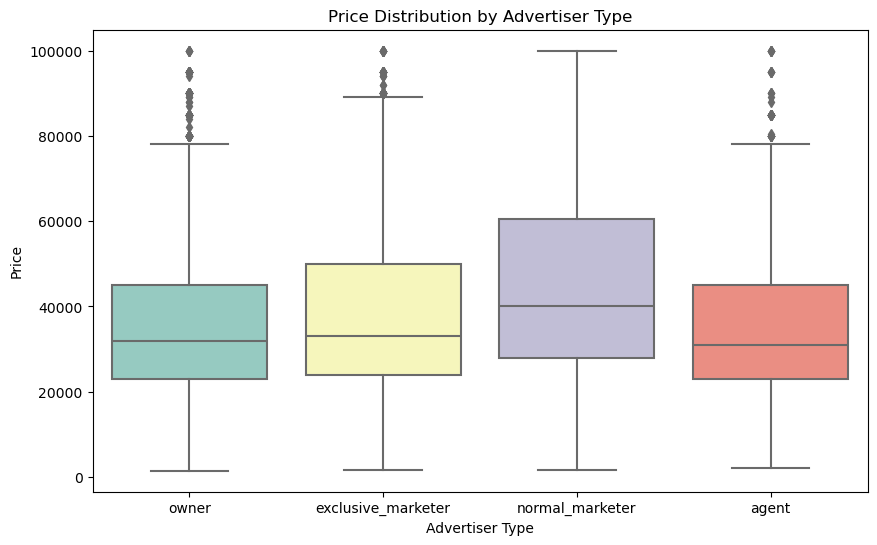

In [13]:
#price by advertiser type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='advertiser_type', y='price', palette='Set3')
plt.title("Price Distribution by Advertiser Type")
plt.xlabel("Advertiser Type")
plt.ylabel("Price")
plt.show()


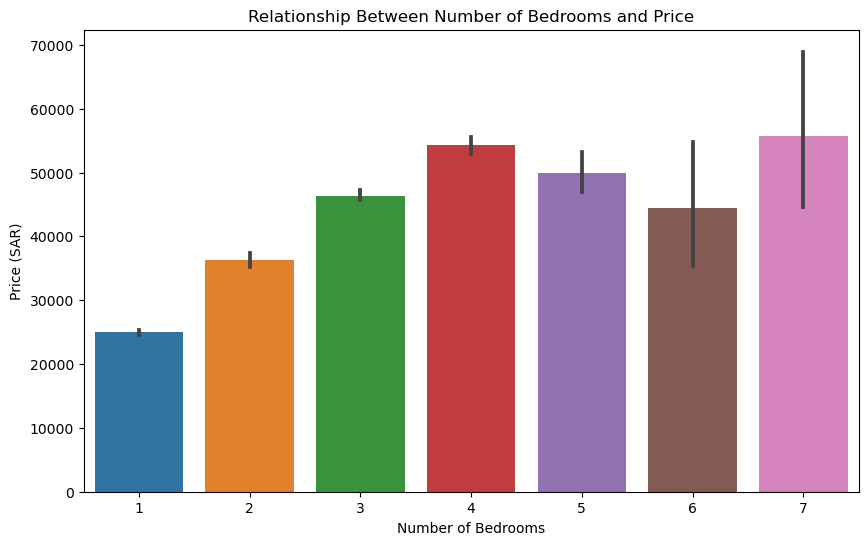

In [19]:
# Bedrooms vs Price
plt.figure(figsize=(10, 6))
sns.barplot(x='beds', y='price', data=df)
plt.title('Relationship Between Number of Bedrooms and Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (SAR)')
plt.show()


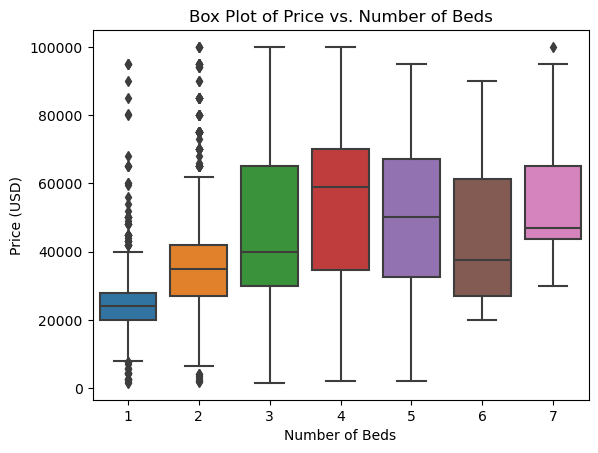

In [23]:
sns.boxplot(data=df, x='beds', y='price')
plt.xlabel('Number of Beds')
plt.ylabel('Price (USD)')
plt.title('Box Plot of Price vs. Number of Beds')
plt.show()

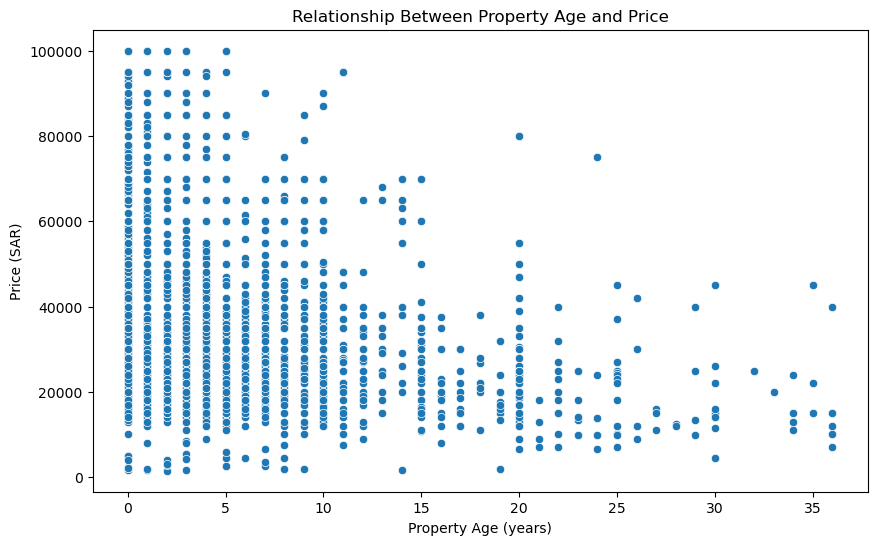

2024-05-17 20:52:40,992 - INFO     - Executing shutdown due to inactivity...
2024-05-17 20:52:41,018 - INFO     - Executing shutdown...
2024-05-17 20:52:41,019 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [25]:
# Property Age vs Price 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='price', data=df)
plt.title('Relationship Between Property Age and Price')
plt.xlabel('Property Age (years)')
plt.ylabel('Price (SAR)')
plt.show()


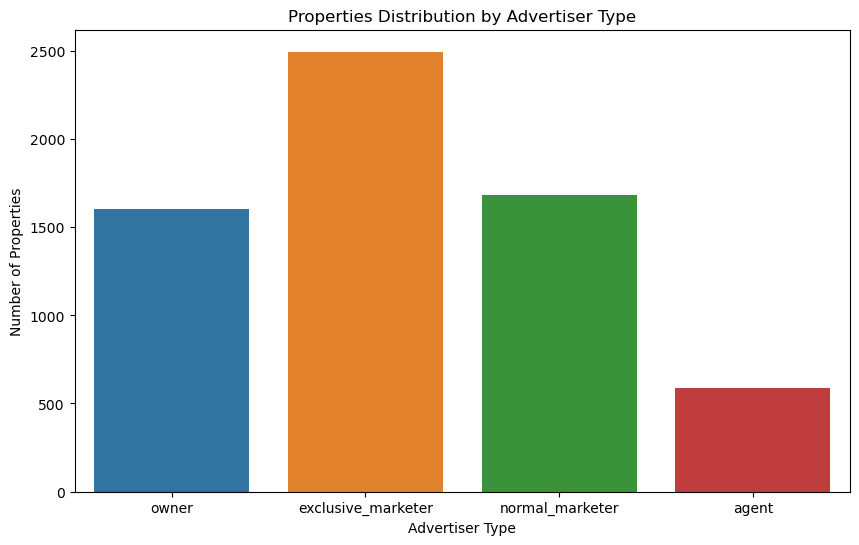

In [76]:
# Distribution by advertiser type
plt.figure(figsize=(10, 6))
sns.countplot(x='advertiser_type', data=df)
plt.title('Properties Distribution by Advertiser Type')
plt.xlabel('Advertiser Type')
plt.ylabel('Number of Properties')
plt.show()

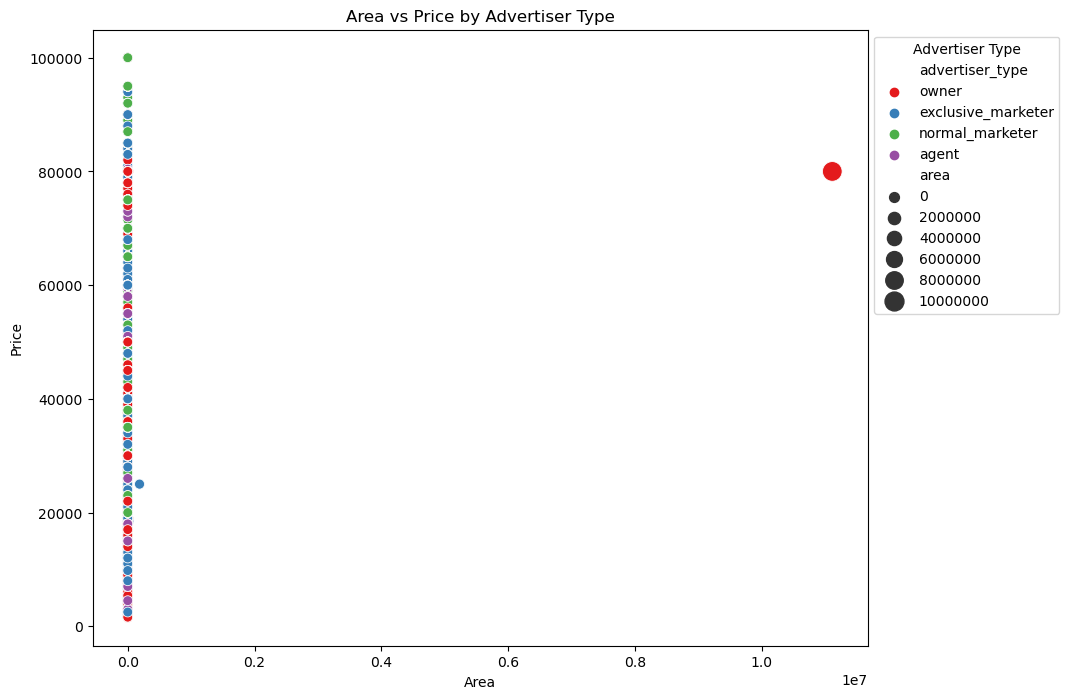

In [92]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='area', y='price', hue='advertiser_type', palette='Set1', size='area', sizes=(50, 200))
plt.title("Area vs Price by Advertiser Type")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend(title='Advertiser Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


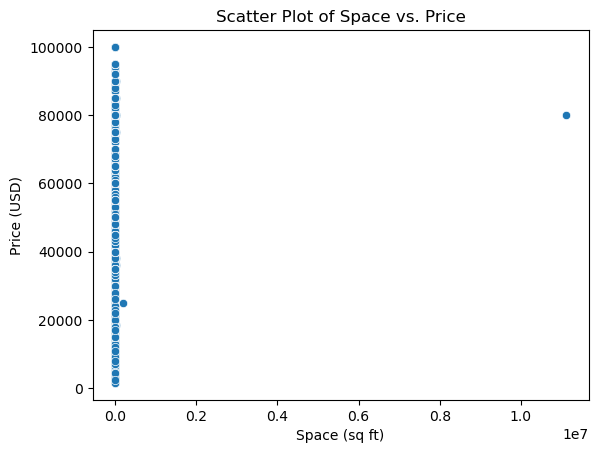

In [75]:
df['space'] = df['width'] * df['length']
sns.scatterplot(data=df, x='space', y='price')
plt.xlabel('Space (sq ft)')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of Space vs. Price')
plt.show()

C:\Users\qouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\qouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\qouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\qouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\qouta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

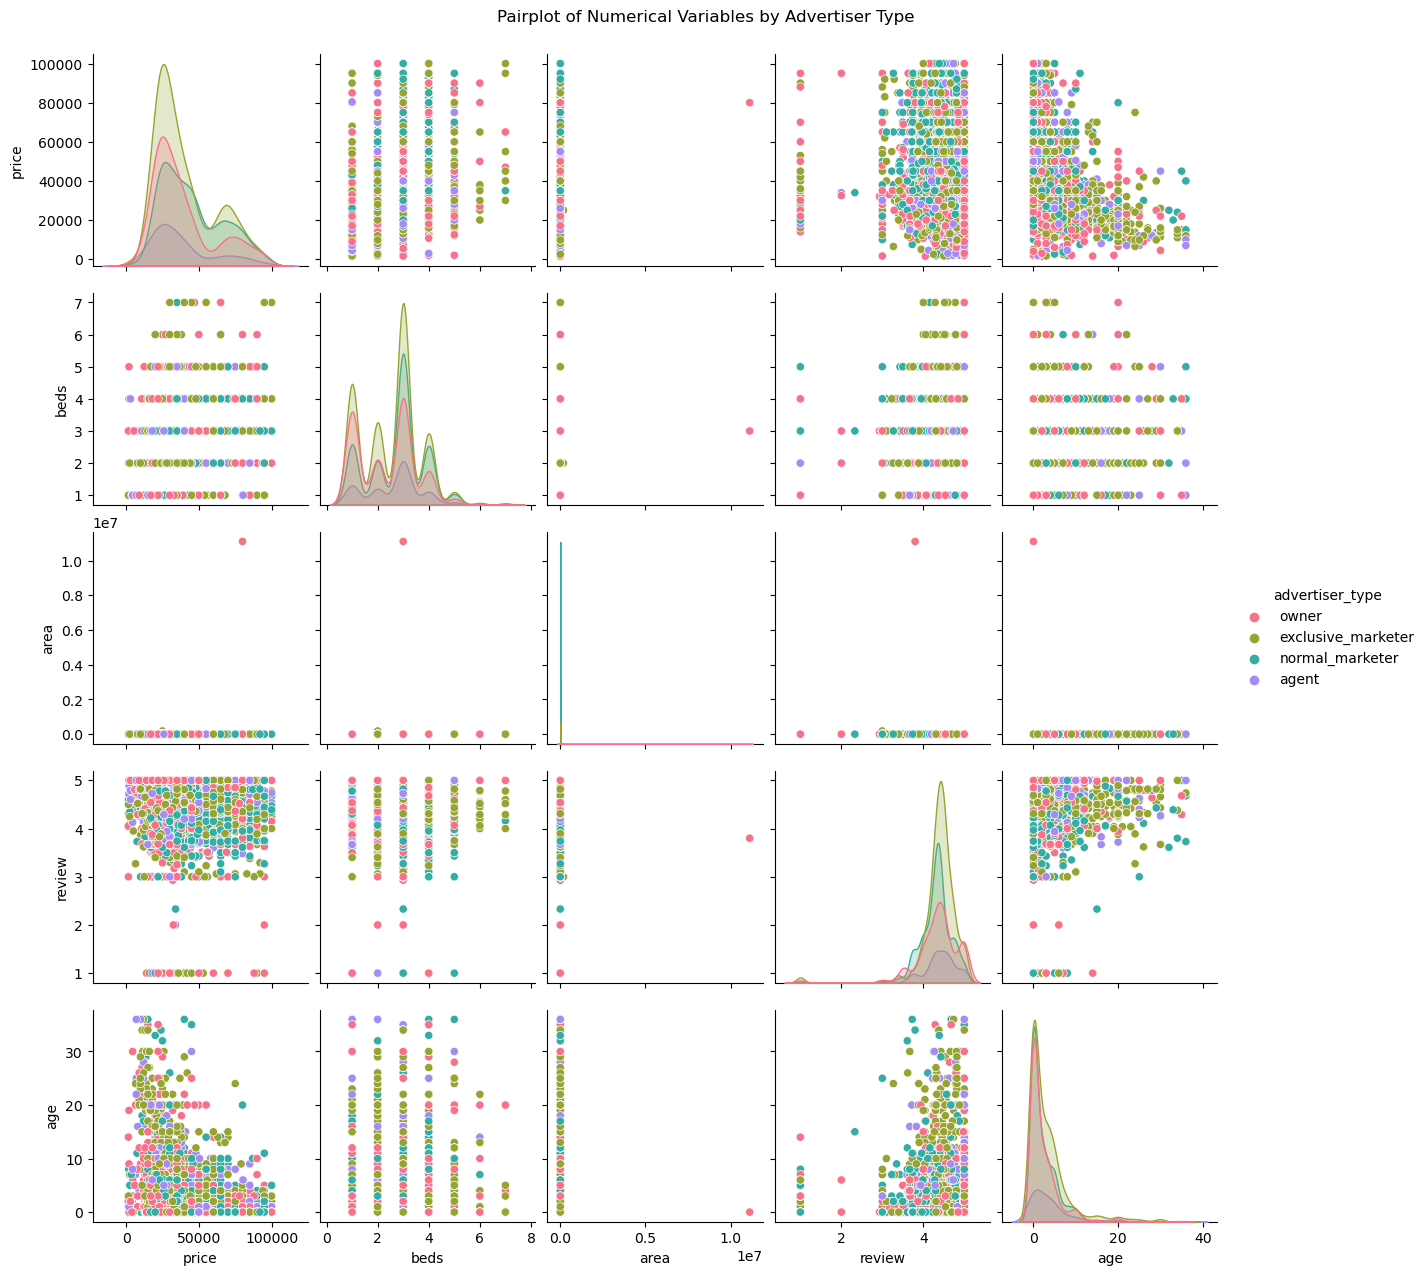

In [87]:
sns.pairplot(df[['price', 'beds', 'area', 'review', 'age', 'advertiser_type']], hue='advertiser_type', palette='husl')
plt.suptitle("Pairplot of Numerical Variables by Advertiser Type", y=1.02)
plt.show()
